In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  sklearn as sk

In [18]:
df = pd.read_csv("Heart_attack.csv")

In [19]:
df['BMI'] =  df['BMI'].fillna(df['BMI'].median())

In [20]:
df['BMI'] = df['BMI'].astype(int)

In [21]:
x = df.drop(columns='HeartDiseaseorAttack')
y = df['HeartDiseaseorAttack']

In [22]:
scaler = sk.preprocessing.MinMaxScaler() 

In [23]:
model = sk.linear_model.LogisticRegression()

In [24]:
pipline = sk.pipeline.Pipeline(
    [
        ("scaler", sk.preprocessing.MinMaxScaler()),
        ("model", sk.linear_model.LogisticRegression())
     ])

In [27]:
score = sk.model_selection.cross_val_score(pipline,x,y,cv=10)

In [29]:
score.mean()

np.float64(0.9074601140916165)

In [28]:
a = [0.9074]

In [30]:
score

array([0.90446154, 0.90984615, 0.90923077, 0.90576923, 0.90861538,
       0.90730769, 0.90630769, 0.90823077, 0.90883914, 0.90599277])

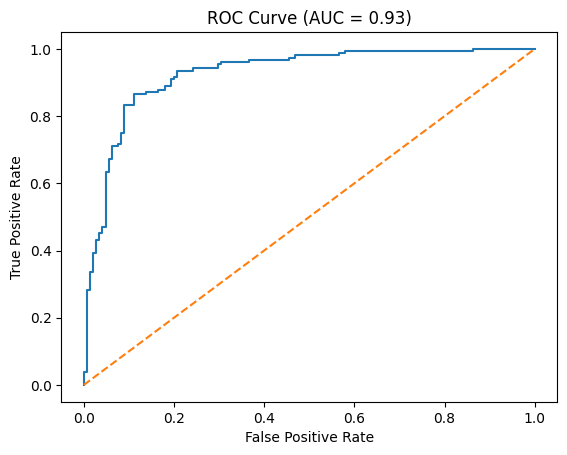

In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# create sample binary classification data
X, y = make_classification(n_samples=1000, random_state=42)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# train model
model = LogisticRegression()
model.fit(X_train, y_train)

# predict probabilities (important!)
y_prob = model.predict_proba(X_test)[:, 1]

# calculate ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {auc_score:.2f})")
plt.show()
